# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep Learning.

1. Linear Regression
* **Logistic Regression**
* Artificial Neural Networks
* Deep Neural Networks
* Convolutional Neural Networks

## 2. Logistic Regression

Logistic regression is a regression model where the dependent variable is categorical, and the output can take only two values 0 or 1.
* This **probability** is modeled using a function
    * $\hat{y}=f(Wx+b)$
* We can use the **Sigmoid function** which takes any real input $\mathbf{x} \in \mathbb{R}$, and the logistic regression model thus predicts an output $y \in \{0,1\}$ 
    * $f(z) = \frac{1}{1 + \mathrm{e}^{-z}}$

### Cost function

* Log loss or Cross entropy cost
    * binary-cross-entropy
    * categorical-cross-entropy

---

## Logistic Regression with Keras and TensorFlow

**Activations functions** are non-linear functions applied when passing the output of a layer to the next layer or the final

| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Activation functions**| sigmoid, step, tanh, softmax, ReLU | [keras.io/activations/](https://keras.io/activations/)|

---

## 1. Load data

#### Load libraries

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


#### Getting the data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

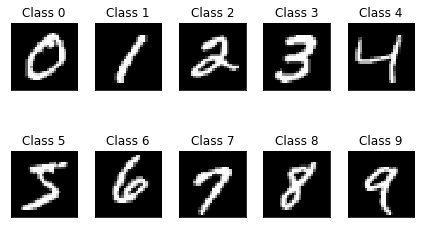

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [5]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [6]:
# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape (60000, 784)
X_test.shape (10000, 784)


#### Convert class vectors to binary class matrices

In [7]:
# 10 classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
# Add layer
model.add(Dense(10, input_dim=28*28, activation='softmax'))

#### Model visualization

In [9]:
# plot a Keras model
plot_model(model, to_file='img/model02_log_reg.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


![Logistic regression](img/model02_log_reg.png)

## 3. Compile model

In [10]:
# compiling the sequential model
model.compile('rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## 4. Fit model

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train_cat,
                    batch_size=256, epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
1s - loss: 0.7409 - categorical_accuracy: 0.8232 - val_loss: 0.3954 - val_categorical_accuracy: 0.8974
Epoch 2/50
0s - loss: 0.3669 - categorical_accuracy: 0.9005 - val_loss: 0.3235 - val_categorical_accuracy: 0.9111
Epoch 3/50
0s - loss: 0.3220 - categorical_accuracy: 0.9106 - val_loss: 0.2999 - val_categorical_accuracy: 0.9156
Epoch 4/50
0s - loss: 0.3025 - categorical_accuracy: 0.9161 - val_loss: 0.2877 - val_categorical_accuracy: 0.9196
Epoch 5/50
0s - loss: 0.2914 - categorical_accuracy: 0.9185 - val_loss: 0.2815 - val_categorical_accuracy: 0.9218
Epoch 6/50
0s - loss: 0.2838 - categorical_accuracy: 0.9208 - val_loss: 0.2759 - val_categorical_accuracy: 0.9224
Epoch 7/50
0s - loss: 0.2782 - categorical_accuracy: 0.9224 - val_loss: 0.2738 - val_categorical_accuracy: 0.9243
Epoch 8/50
0s - loss: 0.2739 - categorical_accuracy: 0.9235 - val_loss: 0.2705 - val_categorical_accuracy: 0.9246
Epoch 9/50
0s - loss: 0.2704 - categor

## 5. Evaluate model

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

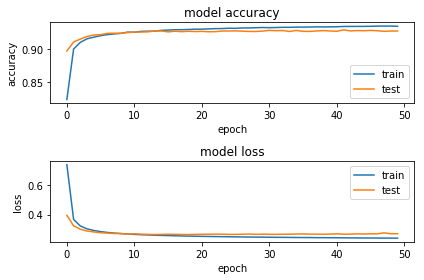

In [13]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [14]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat) 
print("Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(test_loss, test_acc))

 9120/10000 [==========================>...] - ETA: 0sEvaluation result on Test Data:
Loss = 0.2694683021053672
Accuracy = 0.9279


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)